## QED Threshold

Here, we analyze all kinase ligands in clinical trials or FDA-approved ligands and calculate the QED score for all fragments. This QED distribution, which is based on fragments instead of full ligands, gives us a better intuition for a reasonable threshold during the CustomKinFragLib filtering pipeline (see **Custom Notebook 1.2**).

#### Import packages

In [1]:
import pandas as pd
from pathlib import Path
from rdkit.Chem import PandasTools
from kinfraglib import utils
from rdkit import Chem 
import matplotlib.pyplot as plt 
import numpy

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

#### Read data

We download all kinase inhibitors that are in clinical trials or FDA-approved from PKIDB and compare them to all original KLIFS ligands included in our KinFragLib library

In [4]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"

In [5]:
fragment_library = utils.read_fragment_library(PATH_DATA / 'fragment_library')
fragment_library_concat = pd.concat(fragment_library.values())

In [6]:
# read molecules from PKIDB database
reference_mols = []
suppl = Chem.SDMolSupplier(str(PATH_DATA / "external" / "pkidb_2025-04-15.sdf"))
for mol in suppl:
    reference_mols.append(mol)
print(f"Read {len(reference_mols)} molecules from PKIDB")

Read 435 molecules from PKIDB


#### Extract PDB IDs 
Extract PDBs from PKIDB and compare to PDBs recorded in KinFragLib. 

In [7]:
# extract all PDB IDs from ligands in PKIDB
reference_pdbs = []
for mol in reference_mols: 
    if mol.GetProp("pdb_IDs"): 
        pdbs = mol.GetProp("pdb_IDs").split()
        reference_pdbs += pdbs
print(f"Extracted {len(reference_pdbs)} PDB IDs from PKIDB")

Extracted 539 PDB IDs from PKIDB


In [8]:
# extract fragments from KinFragLib that match reference ligands 
fragment_list = []
for ind, row in fragment_library_concat.iterrows(): 
    if row.complex_pdb in reference_pdbs: 
        fragment_list.append(row.ROMol)
len(fragment_list)

697

#### Calculate QED scores

In [9]:
# calculate QED score for all fragments 
qed_scores = []
for frag in fragment_list: 
    qed_scores.append(Chem.QED.qed(frag))


Text(0.5, 0, 'QED')

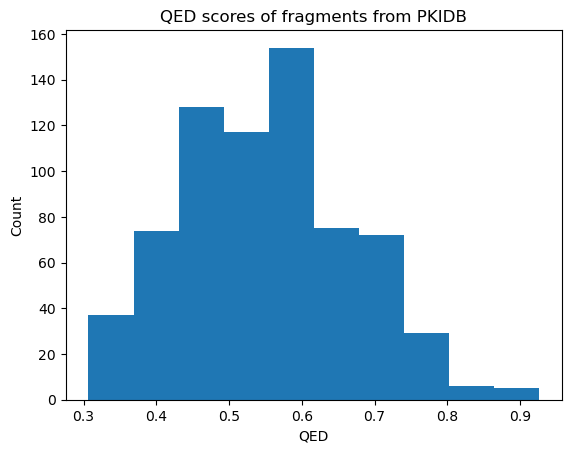

In [10]:
plt.hist(qed_scores)
plt.title("QED scores of fragments from PKIDB")
plt.ylabel("Count")
plt.xlabel("QED")

We calculate the quantiles for the QED scores. To not be too restrictive in our filtering, we choose the threshold to be at the 25% quantile instead of the mean. Our chosen threshold in the CustomKinFragLib notebook therefore is 0.46378398. 

In [11]:
# calculate quantiles for QED scores
numpy.quantile(qed_scores, [0,0.25,0.5,0.75,1])

array([0.30654732, 0.46378398, 0.54893926, 0.63266156, 0.92656994])